In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/counts.csv", keep_default_na=False)
df["name"] = df["name"].astype("string")
df["file"] = df["file"].astype("string")

In [3]:
df.head()

,name,line,column,file
0,sys,2,8,data/repos/BantEnjoer/First_Project/painter.py
1,random,2,13,data/repos/BantEnjoer/First_Project/painter.py
2,argparse,2,21,data/repos/BantEnjoer/First_Project/painter.py
3,numpy,3,8,data/repos/BantEnjoer/First_Project/painter.py
4,np,3,8,data/repos/BantEnjoer/First_Project/painter.py


In [4]:
df.dtypes

name      string[python]
line               int64
column             int64
file      string[python]
dtype: object

In [5]:
df[df["name"].isna()]

,name,line,column,file


## Line investigation

Text(0.5, 1.0, 'Line boxplot')

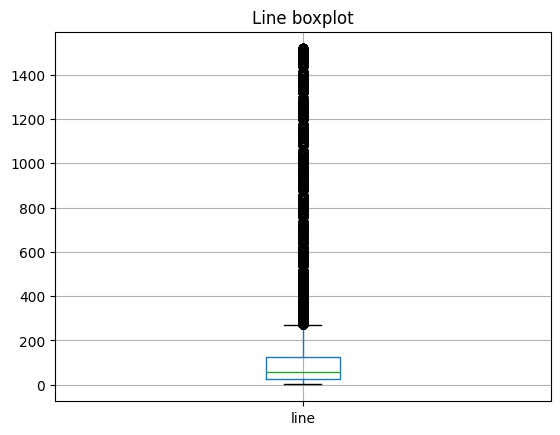

In [6]:
df.boxplot("line (Длина строки))")
plt.title("Line boxplot")

Text(0.5, 1.0, 'Line Histogram')

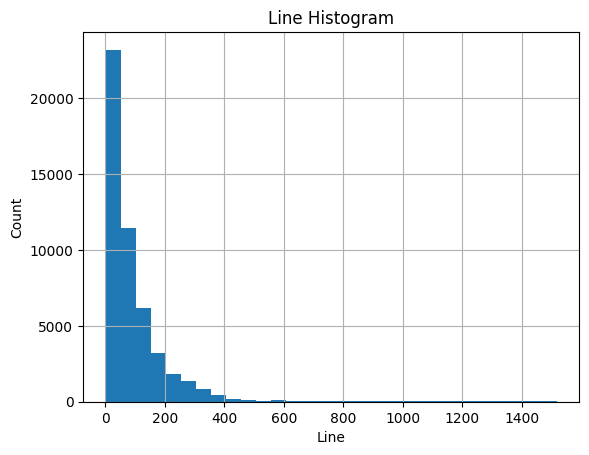

In [7]:
line = df["line"]
line.hist(bins=30)
plt.xlabel("Line")
plt.ylabel("Count")
plt.title("Line Histogram")

Text(0.5, 1.0, 'Line Histogram (stripped)')

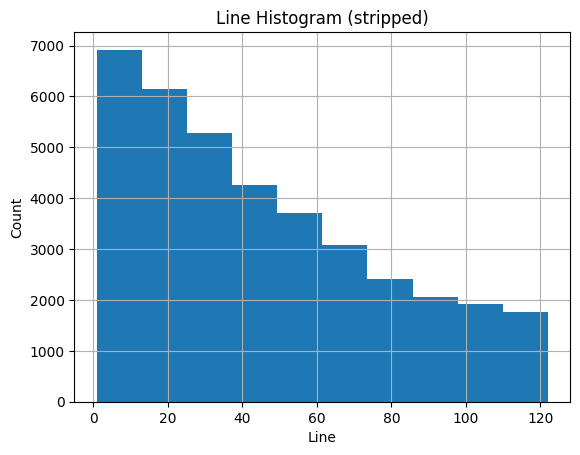

In [8]:
line[line < line.quantile(0.75)].hist()
plt.xlabel("Line")
plt.ylabel("Count")
plt.title("Line Histogram (stripped)")

## Column investigation

Text(0.5, 1.0, 'Column boxplot')

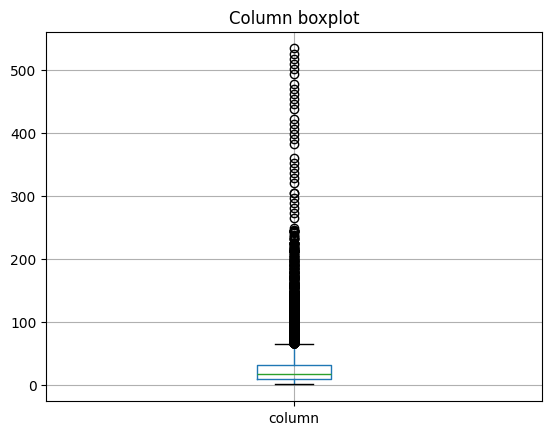

In [9]:
df.boxplot("column")
plt.title("Column boxplot")

Text(0.5, 1.0, 'Column Histogram')

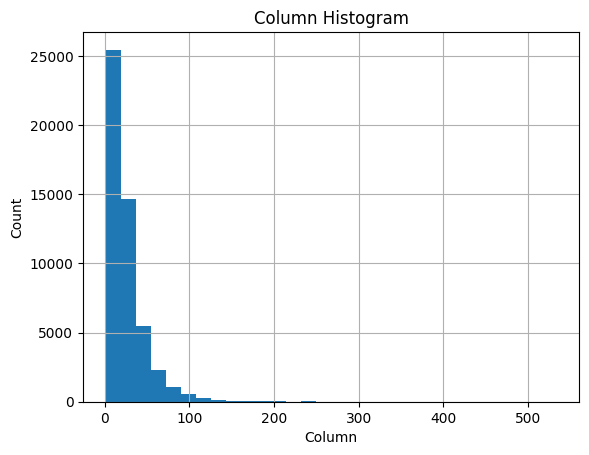

In [10]:
column = df["column"]
column.hist(bins=30)
plt.xlabel("Column")
plt.ylabel("Count")
plt.title("Column Histogram")

Text(0.5, 1.0, 'Column Histogram (stripped)')

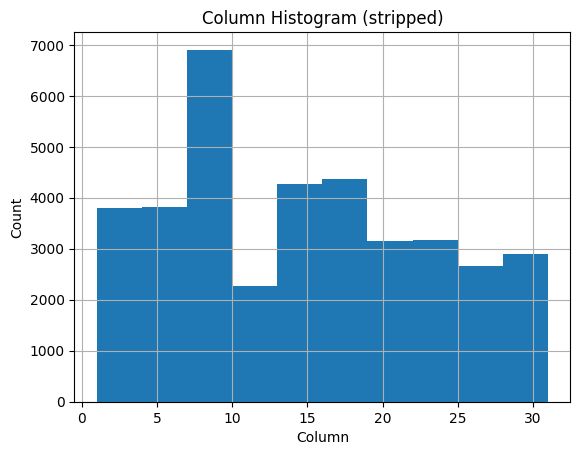

In [11]:
column[column < column.quantile(0.75)].hist()
plt.xlabel("Column")
plt.ylabel("Count")
plt.title("Column Histogram (stripped)")

## Name investigation

In [12]:
df["name"].unique()

<StringArray>
[                  'sys',                'random',              'argparse',
                 'numpy',                    'np',                  'math',
                  'time',                   'PIL',                 'Image',
                   'out',
 ...
 'create_latex_document',           'delete_file',      'get_current_date',
          'I_want_green',                'l_text',         'modified_text',
                'office',               'section',            'subsection',
              'document']
Length: 4559, dtype: string

In [13]:
name_len = df["name_len"] = df["name"].str.len()

<Axes: >

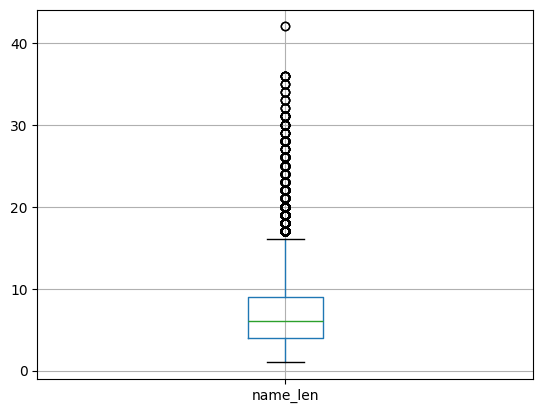

In [14]:
df.boxplot("name_len")

<Axes: >

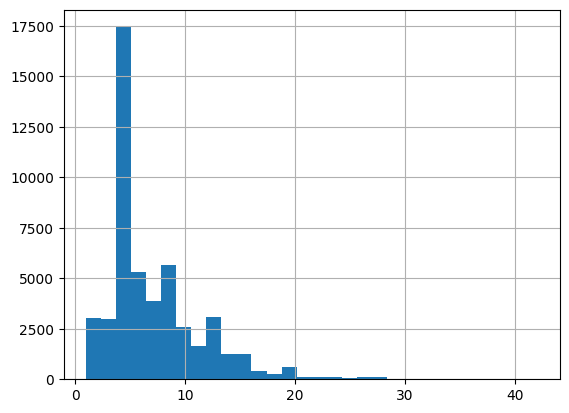

In [15]:
name_len.hist(bins=30)

<Axes: >

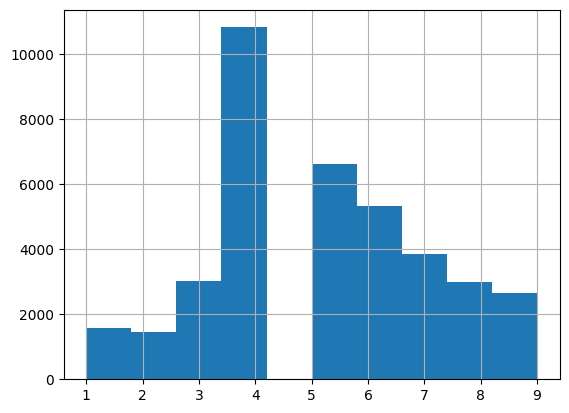

In [16]:
name_len[name_len < 10].hist()

In [17]:
df[name_len > 40]

,name,line,column,file,name_len
18255,update_available_blocks_for_creating_ships,77,5,data/repos/Plyyn/Project_2/Project_2/ships.py,42
18299,update_available_blocks_for_creating_ships,97,21,data/repos/Plyyn/Project_2/Project_2/ships.py,42


### Case investigation

In [18]:
import re

def detect_naming_case(name):
    if re.fullmatch(r'[a-z]+(_[a-z]+)*', name):
        return 'snake_case'
    elif re.fullmatch(r'[a-z]+([A-Z][a-z]*)*', name):
        return 'camelCase'
    elif re.fullmatch(r'[A-Z][a-z]*([A-Z][a-z]*)*', name):
        return 'PascalCase'
    elif re.fullmatch(r'[a-z]+(-[a-z]+)*', name):
        return 'kebab-case'
    elif name.islower():
        return 'lowercase'
    elif name.isupper():
        return 'UPPERCASE'
    else:
        return 'unknown'

In [19]:
df["case"] = df["name"].map(detect_naming_case)

Text(0.5, 1.0, 'Naming case convention')

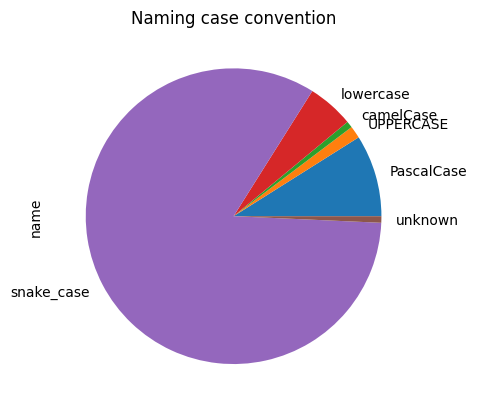

In [20]:
df.groupby("case")["name"].count().plot.pie()
plt.title("Naming case convention")

In [21]:
df[df["case"] == "unknown"]

,name,line,column,file,name_len,case
632,two_D_graph,11,23,data/repos/slaaaaay/tg_bot_graphs_2d_3d/projec...,11,unknown
760,two_D_graph,99,21,data/repos/slaaaaay/tg_bot_graphs_2d_3d/projec...,11,unknown
823,two_D_graph,126,21,data/repos/slaaaaay/tg_bot_graphs_2d_3d/projec...,11,unknown
888,two_D_graph,153,21,data/repos/slaaaaay/tg_bot_graphs_2d_3d/projec...,11,unknown
950,two_D_graph,178,21,data/repos/slaaaaay/tg_bot_graphs_2d_3d/projec...,11,unknown
...,...,...,...,...,...,...
48654,Macros_class,13,1,data/repos/ShurikFUN/prog_pyproj_2/Macros/Macr...,12,unknown
48869,Macros_class,1,20,data/repos/ShurikFUN/prog_pyproj_2/Macros/main.py,12,unknown
48881,Macros_class,10,13,data/repos/ShurikFUN/prog_pyproj_2/Macros/main.py,12,unknown
49943,I_want_green,3,1,data/repos/spare1the1governor/Python-71TeX-28/...,12,unknown


### Name frequency

In [22]:
freq = df.groupby("name").count()["line"].sort_values(ascending=False)
freq

name
self                4238
message              968
print                820
text                 797
pygame               578
                    ... 
stroke_width           1
stroke_fill            1
BACKGROUND_COLOR       1
ArgumentParser         1
BUTTONTEXTCOLOR        1
Name: line, Length: 4559, dtype: int64

Text(0.5, 1.0, 'Top 10 most used names')

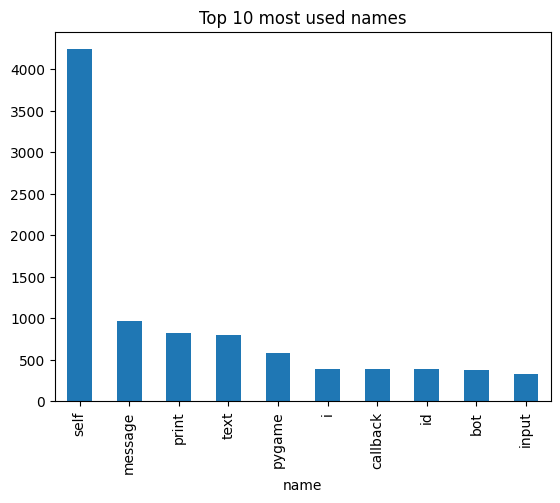

In [23]:
freq[:10].plot.bar()
plt.title("Top 10 most used names")

## Word Cloud

(np.float64(-0.5), np.float64(1199.5), np.float64(599.5), np.float64(-0.5))

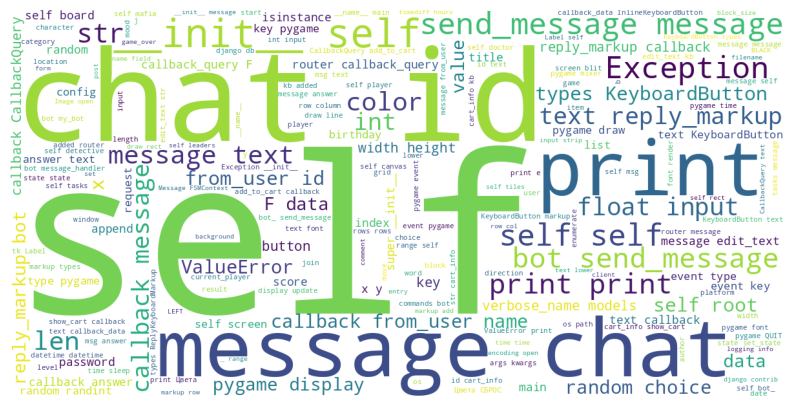

In [24]:
from wordcloud import WordCloud

cloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
).generate(df["name"].str.cat(sep=" "))
plt.figure(figsize=(10, 8))
plt.imshow(cloud)
plt.axis("off")